# From the series to the DataFrame
Thank you for checking out the code for: 

> Hogan, Bernie (2022, forthcoming) _From Social Science to Data Science_. Sage Publications. 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://www.github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's forthcoming website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.03.WranglingII_TheDataFrame.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.03.WranglingII_TheDataFrame.ipynb)

In [1]:
import pandas as pd 

In [2]:
smuppet = pd.Series({"Kermit":"frog", 
                        "Fozzie":"bear", 
                        "Miss Piggy":"pig"})
display(smuppet)

Kermit        frog
Fozzie        bear
Miss Piggy     pig
dtype: object

In [3]:
muppet_df = pd.DataFrame(smuppet)

display(muppet_df)

,0
Kermit,frog
Fozzie,bear
Miss Piggy,pig


In [4]:
smuppet = pd.Series({"Kermit":"frog", 
                     "Fozzie":"bear", 
                     "Miss Piggy":"pig"}, 
                    name="MuppetType")

muppet_df = pd.DataFrame(smuppet)

display(muppet_df)

,MuppetType
Kermit,frog
Fozzie,bear
Miss Piggy,pig


In [5]:
muppet_df.columns = ["ExampleNameChange"]

display(muppet_df)

,ExampleNameChange
Kermit,frog
Fozzie,bear
Miss Piggy,pig


# DataFrames with Multiple Columns

## From a List of Lists

In [6]:
muppet_list = [["Kermit","frog",1955,"male"], 
              ["Miss Piggy", "pig", 1974, "female"], 
              ["Fozzie", "bear", 1976, "male"]]

muppet_df = pd.DataFrame(muppet_list)
display(muppet_df)

,0,1,2,3
0,Kermit,frog,1955,male
1,Miss Piggy,pig,1974,female
2,Fozzie,bear,1976,male


In [7]:
muppet_df.columns = ['Name','Species','FirstAppearance','Gender']
display(muppet_df)

,Name,Species,FirstAppearance,Gender
0,Kermit,frog,1955,male
1,Miss Piggy,pig,1974,female
2,Fozzie,bear,1976,male


In [8]:
muppet_df.set_index("Name", inplace=True)
display(muppet_df)

,Species,FirstAppearance,Gender
Name,,,
Kermit,frog,1955,male
Miss Piggy,pig,1974,female
Fozzie,bear,1976,male


## From a dictionary 

In [9]:
muppet_df = pd.DataFrame.from_dict({"Kermit":"frog", 
                                    "Fozzie":"bear", 
                                    "Janice":"hippy"},
                                   orient="index")

display(muppet_df)

,0
Kermit,frog
Fozzie,bear
Janice,hippy


In [10]:
muppet_dict = {"Kermit": ["frog",1955,"Male"], 
              "Miss Piggy":["pig", 1974, "Female"], 
              "Gonzo": ["unknown", 1970, "Male"]}

muppet_df = pd.DataFrame.from_dict(muppet_dict,
                                   orient="index",
                                   columns=["species",
                                            "firstappearance",
                                            "gender"])

display(muppet_df)

,species,firstappearance,gender
Kermit,frog,1955,Male
Miss Piggy,pig,1974,Female
Gonzo,unknown,1970,Male


In [11]:
muppet_df_cols = pd.DataFrame.from_dict(muppet_dict,
                             orient="columns") 

display(muppet_df_cols)

,Kermit,Miss Piggy,Gonzo
0,frog,pig,unknown
1,1955,1974,1970
2,Male,Female,Male


# Getting data from a DataFrame: Querying, masking and slicing

## Getting data about the DataFrame itself 

In [12]:
print(f"The number of cases in the DataFrame is {len(muppet_df)}")
print(f"The shape of the DataFrame is {muppet_df.shape}",end="\n\n")
print(muppet_df.info(),end="\n\n")
print(muppet_df.describe())

The number of cases in the DataFrame is 3
The shape of the DataFrame is (3, 3)

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Kermit to Gonzo
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   species          3 non-null      object
 1   firstappearance  3 non-null      int64 
 2   gender           3 non-null      object
dtypes: int64(1), object(2)
memory usage: 96.0+ bytes
None

       firstappearance
count         3.000000
mean       1966.333333
std          10.016653
min        1955.000000
25%        1962.500000
50%        1970.000000
75%        1972.000000
max        1974.000000


## Returning a single row or column

In [13]:
display(muppet_df["species"])

Kermit           frog
Miss Piggy        pig
Gonzo         unknown
Name: species, dtype: object

In [14]:
display(muppet_df.loc["Kermit"])

species            frog
firstappearance    1955
gender             Male
Name: Kermit, dtype: object

In [15]:
display(muppet_df.iloc[2])

species            unknown
firstappearance       1970
gender                Male
Name: Gonzo, dtype: object

## Returning multiple columns

In [16]:
display(muppet_df[["firstappearance","species"]])

,firstappearance,species
Kermit,1955,frog
Miss Piggy,1974,pig
Gonzo,1970,unknown


## Returning a single element 

In [17]:
# Let's get Piggy's year of first appearance:
%timeit x = muppet_df.loc["Miss Piggy","firstappearance"]
%timeit x = muppet_df.loc["Miss Piggy"]["firstappearance"]
%timeit x = muppet_df.iloc[1][1]

5.72 µs ± 86.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
44.4 µs ± 882 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
39.2 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Returning a slice of data 

### Slicing by position 

In [18]:
display(muppet_df.iloc[:2])

,species,firstappearance,gender
Kermit,frog,1955,Male
Miss Piggy,pig,1974,Female


### Boolean slicing (A 'mask')

In [19]:
display(muppet_df["firstappearance"] > 1967)

Kermit        False
Miss Piggy     True
Gonzo          True
Name: firstappearance, dtype: bool

In [20]:
display(muppet_df[muppet_df["firstappearance"] > 1967])

,species,firstappearance,gender
Miss Piggy,pig,1974,Female
Gonzo,unknown,1970,Male


# Changing Data at different scales 

## Adding data to an existing DataFrame

### By Column

In [21]:
muppet_df = pd.DataFrame.from_dict({"Kermit":"frog",
                                    "Miss Piggy":"pig", 
                                    "Gonzo":"unknown"},
                                    orient="index",
                                    columns=["species"])

muppet_year = pd.Series({"Gonzo":1970,
                         "Kermit":1955,
                         "Miss Piggy":1974})

muppet_df["firstappearance"] = muppet_year
muppet_df["firstdecade"] = (muppet_df["firstappearance"] // 10) * 10

display(muppet_df)

,species,firstappearance,firstdecade
Kermit,frog,1955,1950
Miss Piggy,pig,1974,1970
Gonzo,unknown,1970,1970


In [22]:
muppet_df_bad = pd.DataFrame.from_dict({"Kermit":"frog",
                                    "Miss Piggy":"pig", 
                                    "Gonzo":"unknown"},
                                    orient="index",
                                    columns=["species"])

muppet_df_bad["firstappearance"] = {"Gonzo":1970,
                                     "Kermit":1955,
                                     "Miss Piggy":1974}

display(muppet_df_bad)

,species,firstappearance
Kermit,frog,Gonzo
Miss Piggy,pig,Kermit
Gonzo,unknown,Miss Piggy


In [23]:
muppet_gender = ["male","female","male"]

muppet_df["gender"] = muppet_gender

display(muppet_df)

,species,firstappearance,firstdecade,gender
Kermit,frog,1955,1950,male
Miss Piggy,pig,1974,1970,female
Gonzo,unknown,1970,1970,male


### By Row 

In [24]:
muppet_df = pd.DataFrame.from_dict({"Kermit":"frog",
                                    "Miss Piggy":"pig", 
                                    "Gonzo":"unknown"},
                                    orient="index",
                                    columns=["species"])

muppet_df.loc["Scooter"] = ["muppet"]

display(muppet_df)

,species
Kermit,frog
Miss Piggy,pig
Gonzo,unknown
Scooter,muppet


In [25]:
try: 
    muppet_df.iloc[4] = ["Generic Muppet"]
    display(muppet_df)
except IndexError: 
    print("You needed to have this index already in the DataFrame.")    

You needed to have this index already in the DataFrame.


In [26]:
try: 
    muppet_df.iloc[2] = ["whatever"]
    display(muppet_df)
except IndexError: 
    print("You needed to have this index already in the DataFrame.")    

,species
Kermit,frog
Miss Piggy,pig
Gonzo,whatever
Scooter,muppet


In [27]:
muppet_df.loc["Fozzie"] = ["bear"]
display(muppet_df)

,species
Kermit,frog
Miss Piggy,pig
Gonzo,whatever
Scooter,muppet
Fozzie,bear


### Adding one DataFrame to another 

In [28]:
df1 = pd.DataFrame({"col1":[0,1],"col2":["A","C"]})
display(df1)

,col1,col2
0,0,A
1,1,C


In [29]:
df2 = pd.DataFrame({"col1":[2,5],"col2":["A","B"]})
display(df2)

,col1,col2
0,2,A
1,5,B


In [30]:
new_df = pd.concat([df1,df2])

display(new_df)

,col1,col2
0,0,A
1,1,C
0,2,A
1,5,B


## Changing a column or the entire DataFrame: Apply, Map, and ApplyMap

In [31]:
import pandas as pd 
from io import StringIO

movies = '''user,Ghosts of Hidden Valley,The Perspex Event,Stinker\'s Bad Day,These Girls
user1,4,5,2,2.5
user2,3,3.5,4.5,1
user3,2,4,3,4
user4,4,4.5,2,4'''

movie_df = pd.read_csv(StringIO(movies),index_col=0)

display(movie_df)

,Ghosts of Hidden Valley,The Perspex Event,Stinker's Bad Day,These Girls
user,,,,
user1,4,5.0,2.0,2.5
user2,3,3.5,4.5,1.0
user3,2,4.0,3.0,4.0
user4,4,4.5,2.0,4.0


### Using `map()`

In [32]:
movie_df["These Girls"].map(lambda x: x/5*100)

user
user1    50.0
user2    20.0
user3    80.0
user4    80.0
Name: These Girls, dtype: float64

### Using `apply()`

In [33]:
movie_df.apply(min)

Ghosts of Hidden Valley    2.0
The Perspex Event          3.5
Stinker's Bad Day          2.0
These Girls                1.0
dtype: float64

In [34]:
# movie_df.apply(mean) # This will fail, recall discussion last chapter 
print(movie_df.apply(lambda score: score.mean())) # This will succeed.

Ghosts of Hidden Valley    3.250
The Perspex Event          4.250
Stinker's Bad Day          2.875
These Girls                2.875
dtype: float64


In [35]:
movie_df.apply(lambda x: (x.min(), x.max()),axis=1)

user
user1    (2.0, 5.0)
user2    (1.0, 4.5)
user3    (2.0, 4.0)
user4    (2.0, 4.5)
dtype: object

### Using `applymap()`

In [36]:
display(movie_df.applymap(lambda x: int(x/0.05)))

,Ghosts of Hidden Valley,The Perspex Event,Stinker's Bad Day,These Girls
user,,,,
user1,80,100,40,50
user2,60,70,90,20
user3,40,80,60,80
user4,80,90,40,80


In [37]:
movie_df.iloc[0:2].apply(lambda x: x.mean())

Ghosts of Hidden Valley    3.50
The Perspex Event          4.25
Stinker's Bad Day          3.25
These Girls                1.75
dtype: float64

In [38]:
movie_df.iloc[0:2].apply(lambda x: x.mean(),axis=1)

user
user1    3.375
user2    3.000
dtype: float64

### Summarising `map()`, `apply()`, and `applymap`

### Summarising `lambda` versus a named function

## Deep versus Shallow Copies

In [39]:
# Reinitialise the data
muppet_dict = {"Kermit": ["frog",1955,"Male"], 
              "Miss Piggy":["pig", 1974, "Female"], 
              "Gonzo": ["unknown", 1970, "Male"]}

muppet_df = pd.DataFrame.from_dict(muppet_dict,
                                   orient="index")

muppet_df.columns=["species","firstappearance","gender"]
display(muppet_df)

,species,firstappearance,gender
Kermit,frog,1955,Male
Miss Piggy,pig,1974,Female
Gonzo,unknown,1970,Male


In [40]:
# Attempt 1 (which will fail)
muppet_df.loc["Gonzo"]["species"] = "whatever"

display(muppet_df) 

/var/folders/bh/25j4bx3x431d50tj0q7vwz400000gn/T/ipykernel_2232/2975529778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muppet_df.loc["Gonzo"]["species"] = "whatever"


,species,firstappearance,gender
Kermit,frog,1955,Male
Miss Piggy,pig,1974,Female
Gonzo,unknown,1970,Male


In [41]:
# Attempt 2 (which will succeed)
muppet_df.loc["Gonzo","species"] = "whatever"

display(muppet_df)

,species,firstappearance,gender
Kermit,frog,1955,Male
Miss Piggy,pig,1974,Female
Gonzo,whatever,1970,Male


In [42]:
newmuppet_df = muppet_df

newmuppet_df.loc["Kermit","species"] = "lizard" #change in newmuppet_df

display(muppet_df.loc["Kermit","species"]) #it appears in original muppet_df

'lizard'

# Advanced Topics: Numpy and Numpy Arrays

In [43]:
import numpy as np 

In [44]:
# Single vector
npa = np.arange(12)
print(npa,end="\n\n")

# Matrix reshaping
npbox = npa.reshape(3,4)
print(type(npbox), npbox, sep="\n", end="\n\n")

# List that looks like a matrix
lbox = [[  0,  1,  2,  3],
        [  4,  5,  6,  7],
        [  8, 9,  10, 11]]

print(type(lbox), lbox, sep="\n", end="\n\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11]

<class 'numpy.ndarray'>
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

<class 'list'>
[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]]



In [45]:
lbox2 = [[ 1,  1,  2,  3],
         [ 4,  5,  6,  7]]

print(lbox == npbox, end="\n\n")

print(lbox == lbox2)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]

False


In [46]:
print(lbox2 == npbox, end="\n\n")

False



/var/folders/bh/25j4bx3x431d50tj0q7vwz400000gn/T/ipykernel_2232/4079372021.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(lbox2 == npbox, end="\n\n")


### Reshaping in `numpy` 

In [47]:
np.arange(12).reshape(3,2,2)

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [48]:
import random

In [49]:
random.randint(0,10)

6

In [50]:
one_val = np.random.normal(0,10)
one_val

-4.656437904348639

In [51]:
dist1 = np.random.normal(0,10,20)
dist1

array([ 10.65876415, -13.47452677, -10.83471028,  -4.17920684,
       -23.36313658,  -8.27963143,  14.49725418,   4.76841958,
         6.35275076,  -2.62056422, -10.10710526,   2.34223789,
         1.01799416,   9.74740896,   9.40029851,  11.24187567,
        -9.60679046,   2.38717793,  -6.40967942,  12.70560874])

In [52]:
dist2 = np.random.normal(0,10,(2,2,4))

print(dist2,dist2.shape, sep="\n\n")

[[[ -2.85658764  -2.06946163   7.88860158  10.65545066]
  [  8.64889716   1.80567811   5.89948745  16.02207135]]

 [[  5.03024288  25.08466833 -32.63289204 -27.77144009]
  [ 15.19276889  -2.1938101   -4.32274101  -2.47963295]]]

(2, 2, 4)


In [53]:
print(dist2[0][1],dist2[0][1].shape, sep="\n\n")

[ 8.64889716  1.80567811  5.89948745 16.02207135]

(4,)


In [54]:
import seaborn as sns # A plotting package (See more details in Chapter 9)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # Makes output more crisp

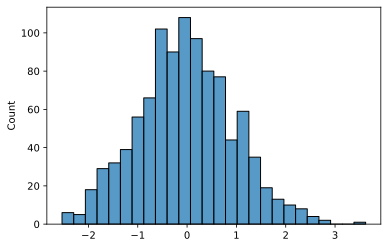

In [55]:
dist = np.random.normal(0,1,(1000))
sns.histplot(dist)

plt.show()

In [56]:
print(f"Array mean: {dist.mean():.2f},\nArray stddev: {dist.std():.2f}")

Array mean: -0.02,
Array stddev: 0.96


## Linear algebra and `numpy` 

# Summary

# Further reading 

# Extensions and reflections